# **Analysis of DC Metro Crime**

##Spring 2025 Data Science Project

####Emma Gass, Amanee Jamil, Ifra Syed, Sneha Wagle, Niyati Sharma

##**Contributions**:

Emma: I worked on the ANOVA and Post-hoc test in the Exploratory Data Analysis section. I also worked on creating the ML Algorithm Training code and Test Data Analysis. Additionally, I helped contribute to the written portions in the Introduction, Data Exploration, and Primary Analysis sections and created the visualization plot.

Amanee: I worked on the ANOVA and Post-hoc tests in the Exploratory Data Analysis section. I also worked on the ML Algorithm Training and Test Data Analysis in the Primary Analysis section. Additionally, I helped contribute to the written portions in the Introduction, Data Exploration, and Primary Analysis sections and created the visualization plot.

Ifra: I helped to choose a topic and find a specific dataset to start off our project (DC Metro Crime data). I also worked on the ANOVA Test in the Exploratory Data Analysis Section. In our final steps of the project, I contributed to making and refining the ML Model and providing explanations for our work.

Sneha: I also worked on running, graphing, analyzing the Chi-Squared test in the Exploratory Data Analysis Section. I also helped refine the original version of our model, I and wrote the conclusion.

Niyati: I helped choose a topic and find the dataset to use for the project as well. I worked on the Chi-squared test and graphs in the Exploratory Data Analysis section. I also worked on making, evaluating, and refining the original model and writing parts of the the Primary Analysis section.

##**Introduction**  
The overall objective of this project is to analyze DC Metro Crime data over the span of 10 years (2007-2017) to highlight the where and when crime risk is at its highest. Specifically we will determine:



*   Which day of the week is the most dangerous
*   The time of day/ shift that has the highest crime
*   Which crimes are the most severe





Our goal is to bring awareness to what day of the week and what time of day the risk of taking a metro is increased.  

Why is this important? We want people to have a safe and enjoyable experience on the DC Metro. Finding relations in the data will allow the city to target certain things in order to prevent crime in the future.

During this tutorial we will use various statistical techniques and machine learning methods that will display correlations between weekday/weekend, time of day, type of crime, and amount of crime.

##**Data Curation**

To start off, we must choose a datatset and import it into our program. Here we have chosen a dataset titled "DC Metro Crime Data" from Kaggle. It provides information like the date and time of the crime, the type of crime, and where it occured.

In [ ]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats
!pip install scikit-posthocs
import scikit_posthocs as sp

dataset_dir = kagglehub.dataset_download("vinchinzu/dc-metro-crime-data")

for filename in os.listdir(dataset_dir):
    if filename.endswith(".csv"):
        filepath = os.path.join(dataset_dir, filename)
        break

print("Path to dataset file:", filepath)

df_test = pd.read_csv(filepath)
df_test.head()

Path to dataset file: /kaggle/input/dc-metro-crime-data/dc_crime_add_vars.csv


,Unnamed: 0,X,REPORT_DAT,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,WARD,...,year,month,day,hour,minute,second,EW,NS,quad,crimetype
0,1,1,8/31/2008 8:47:00 PM,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,2.0,206.0,2,...,2008,8,31,20,47,0,West,North,Northwest,Non-Violent
1,2,2,9/1/2008 12:45:00 AM,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,2.0,208.0,2,...,2008,9,1,0,45,0,West,North,Northwest,Non-Violent
2,3,3,9/1/2008 3:00:00 AM,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,1.0,101.0,2,...,2008,9,1,3,0,0,East,North,Northeast,Non-Violent
3,4,4,9/9/2008 7:46:00 AM,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,2.0,208.0,2,...,2008,9,9,7,46,0,West,North,Northwest,Non-Violent
4,5,5,8/24/2008 8:00:00 PM,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,1.0,102.0,2,...,2008,8,24,20,0,0,East,North,Northeast,Non-Violent


Next we narrow the datatset to only have columns of significance. This will help us run our tests only on specific and needed data.

In [ ]:
df_main = df_test[['SHIFT', 'OFFENSE', 'REPORT_DAT', 'DISTRICT', 'crimetype']]
df_main.head()

,SHIFT,OFFENSE,REPORT_DAT,DISTRICT,crimetype
0,EVENING,THEFT/OTHER,8/31/2008 8:47:00 PM,2.0,Non-Violent
1,MIDNIGHT,MOTOR VEHICLE THEFT,9/1/2008 12:45:00 AM,2.0,Non-Violent
2,MIDNIGHT,THEFT/OTHER,9/1/2008 3:00:00 AM,1.0,Non-Violent
3,DAY,THEFT/OTHER,9/9/2008 7:46:00 AM,2.0,Non-Violent
4,EVENING,MOTOR VEHICLE THEFT,8/24/2008 8:00:00 PM,1.0,Non-Violent


#**Exploratory Data Analysis**

In our data analysis we will run tests in order to investigate the data and draw conclusions. From this we can discover patterns and spot anomalies. Specifically, we wanted to observe the relationship between the shift the crime occurred and the type of crime (offense).

## Clean the Data (for ANOVA test)

First, the data will be cleaned to set up for analysis. Any missing data will be dropped.

In [ ]:
#CLEANING THE DATA
cleaned_df = df_main[['SHIFT', 'OFFENSE']].dropna()
cleaned_df = cleaned_df.sample(n = 3000, random_state=42)
cleaned_df

,SHIFT,OFFENSE
161186,DAY,MOTOR VEHICLE THEFT
53763,EVENING,THEFT/OTHER
166716,DAY,THEFT F/AUTO
210400,DAY,MOTOR VEHICLE THEFT
246454,DAY,THEFT/OTHER
...,...,...
167501,MIDNIGHT,ASSAULT W/DANGEROUS WEAPON
278755,MIDNIGHT,ROBBERY
167557,EVENING,THEFT F/AUTO
120370,EVENING,THEFT F/AUTO


##ANOVA test

*Our first statistical test was an ANOVA test. An ANOVA test would be appropriate for our data since we are testing two groups, the shift during which the crime occurred and the offense committed. The aim was to see if there is any correlation between the shift and the offense.*

**Hypotheses:**

Null Hypothesis: There is no correlation between the time of day (shifts) and the type of crime committed.

Alternative Hypothesis: There is a correlation between the shifts of the day and the type of crime committed.

In [ ]:
#DAY
day_df = cleaned_df[cleaned_df['SHIFT'] == 'DAY']
day_total = day_df['OFFENSE'].value_counts()

#EVENING
evening_df = cleaned_df[cleaned_df['SHIFT'] == 'EVENING']
evening_total = evening_df['OFFENSE'].value_counts()

#MIDNIGHT
midnight_df = cleaned_df[cleaned_df['SHIFT'] == 'MIDNIGHT']

midnight_total = midnight_df['OFFENSE'].value_counts()

#ANOVA TEST
f_stat, p = stats.f_oneway(day_total, evening_total, midnight_total)
print(f'p: {p}')

p: 0.21931727195304135


Text(0, 0.5, '# of Crimes')

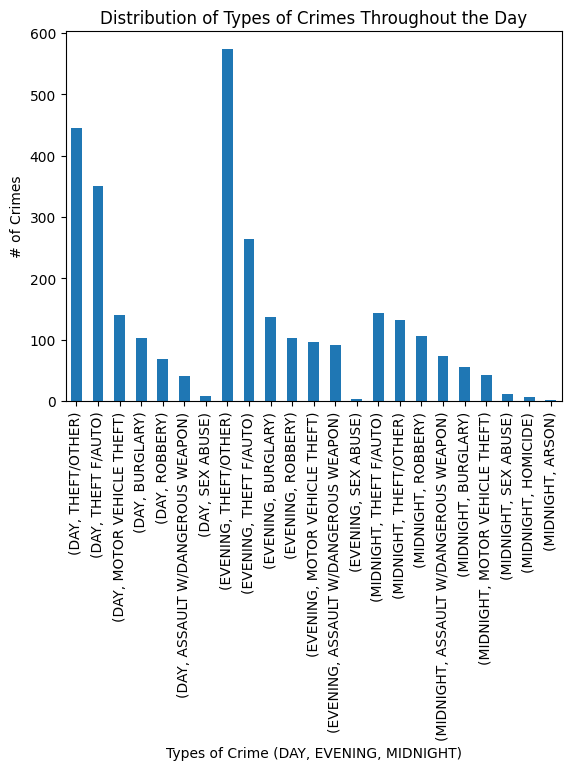

In [ ]:
anova_df = cleaned_df.groupby('SHIFT')['OFFENSE'].value_counts()
anova_df.plot(kind='bar')
plt.title('Distribution of Types of Crimes Throughout the Day')
plt.xlabel('Types of Crime (DAY, EVENING, MIDNIGHT)')
plt.ylabel('# of Crimes')

<ipython-input-34-5d1b16cad229>:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([day_total, evening_total, midnight_total],


Text(0, 0.5, 'Total # of crimes')

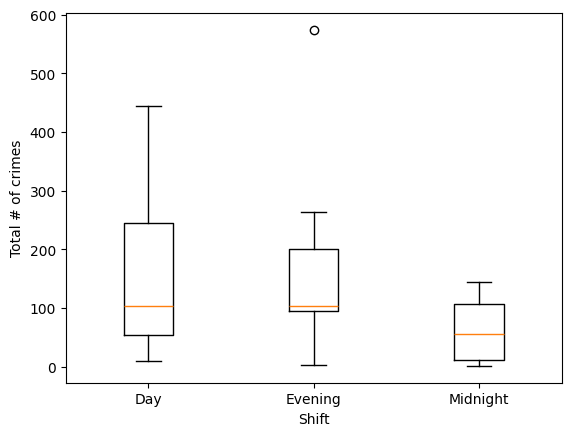

In [ ]:
plt.boxplot([day_total, evening_total, midnight_total],
            labels = ['Day', 'Evening', 'Midnight'])
plt.xlabel('Shift')
plt.ylabel('Total # of crimes')

**Conclusion from Anova test:**
Our p-value was not statistically significant because it was greater than our alpha value of 0.05. This means that we fail to reject our null hypothesis. This means there is not a significant correlation between the time of day (shifts) and the type of crime committed. We also detected an outlier regarding crimes during the evening shift. Theft crimes in the evening were at an all-time high, with almost 600 total cases.

##Post-hoc test

*Our second statistical test was a Post-hoc test, typically run after an ANOVA test. This is done to better understand the correlation between the individual categories. In this case, we were observing if there were any significant differences between the Day, Evening, and Midnight shifts.*

In [ ]:
dfs = [
    pd.DataFrame({'values': day_total.values, 'groups': 'DAY'}),
    pd.DataFrame({'values': evening_total.values, 'groups': 'EVENING'}),
    pd.DataFrame({'values': midnight_total.values, 'groups': 'MIDNIGHT'})
]

data = pd.concat(dfs, ignore_index=True)

posthoc = sp.posthoc_ttest(data, val_col='values', group_col='groups', equal_var=False)
posthoc

,DAY,EVENING,MIDNIGHT
DAY,1.000000,0.869736,0.165345
EVENING,0.869736,1.000000,0.157772
MIDNIGHT,0.165345,0.157772,1.000000


Text(0, 0.5, 'P-value')

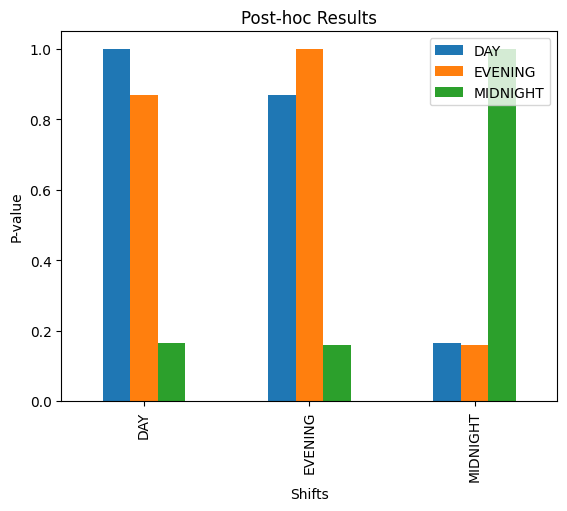

In [ ]:
posthoc.plot(kind='bar')
plt.title('Post-hoc Results')
plt.xlabel('Shifts')
plt.ylabel('P-value')

**Conclusion from Post-hoc test:**

Cell (1,2) shows the p-value between Day and Evening, which is greater than the significance value of 0.05, so we can fail to reject the. null hypothesis. This means that there is not a significant difference between the total crimes for the day shifts and evening shifts.

Cell (1,3) shows the p-value between Day and Midnight, which is greater than the significance value of 0.05, so we can fail to reject the. null hypothesis. This means that there is not a significant difference between the total crimes for the day shifts and midnight shifts.

Cell (2,3) shows the p-value between Evening and Midnight, which is greater than the significance value of 0.05, so we can fail to reject the. null hypothesis. This means that there is not a significant difference between the total crimes for the evening shifts and midnight shifts.

## Chi-squared test

*Our final statistical test was a Chi-Squared Test of Independence. We used this test to assess whether there is a significant association between the shift of the crime and the offense. Since both variables are categorical, this test is most appropriate to evaluate whether the distribution of offense types depends on the time of the shift.*

In [ ]:
table = pd.crosstab(df_main['OFFENSE'], df_main['SHIFT'])
display(table)

SHIFT,DAY,EVENING,MIDNIGHT
OFFENSE,,,
ARSON,101,106,119
ASSAULT W/DANGEROUS WEAPON,5092,9614,8730
BURGLARY,11567,14105,5620
HOMICIDE,0,0,1234
MOTOR VEHICLE THEFT,15194,11762,6232
ROBBERY,7634,15141,12492
SEX ABUSE,673,846,883
THEFT F/AUTO,41133,30059,14095
THEFT/OTHER,50504,63916,16015


SHIFT,DAY,EVENING,MIDNIGHT
OFFENSE,,,
ARSON,101,106,119
ASSAULT W/DANGEROUS WEAPON,5092,9614,8730
BURGLARY,11567,14105,5620
HOMICIDE,0,0,1234
MOTOR VEHICLE THEFT,15194,11762,6232
ROBBERY,7634,15141,12492
SEX ABUSE,673,846,883
THEFT F/AUTO,41133,30059,14095
THEFT/OTHER,50504,63916,16015


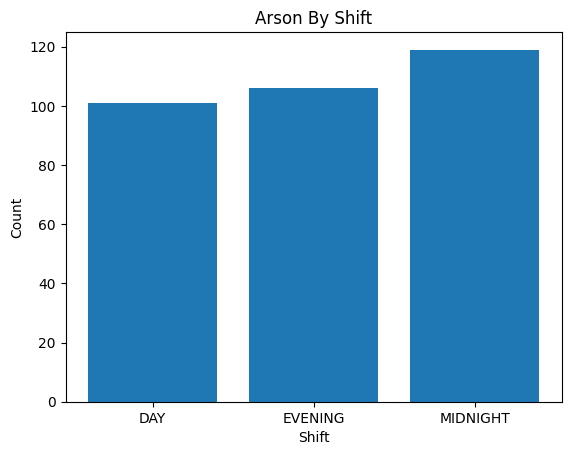

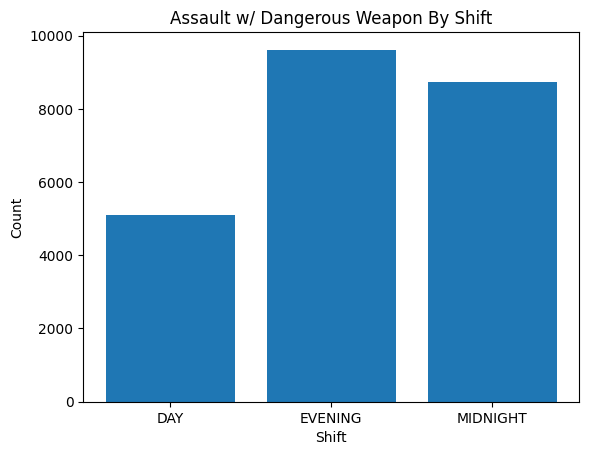

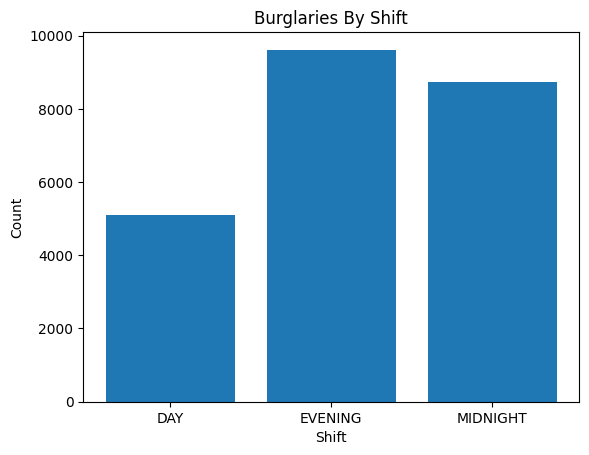

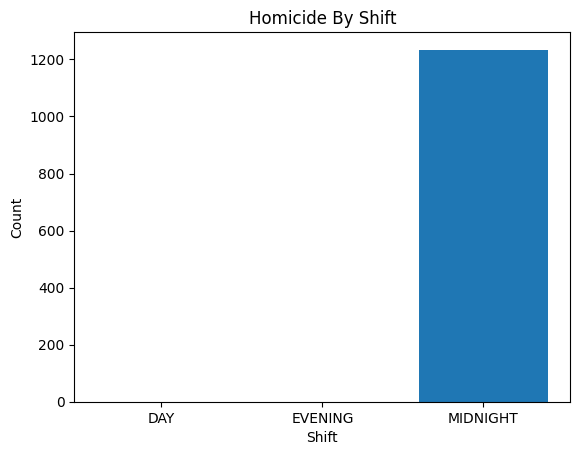

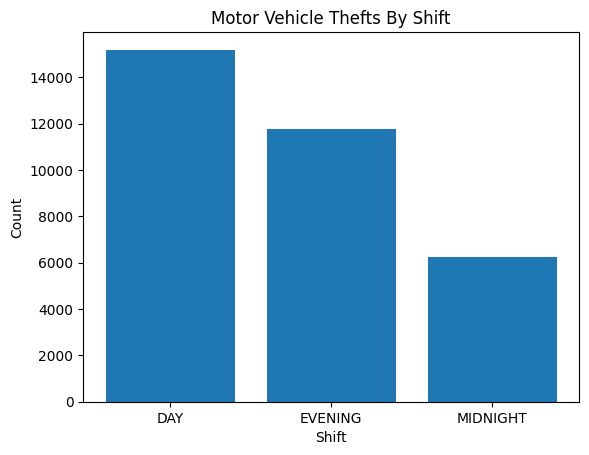

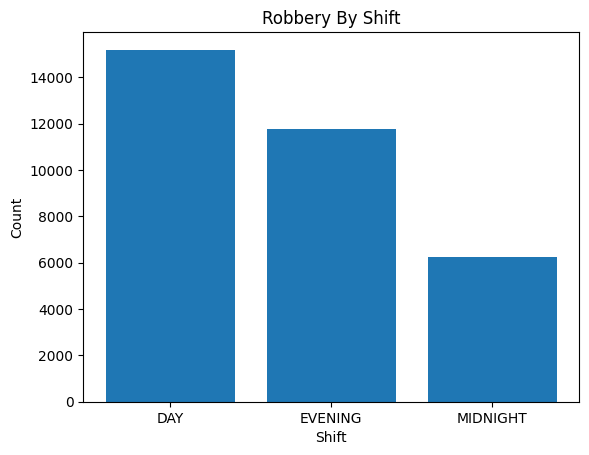

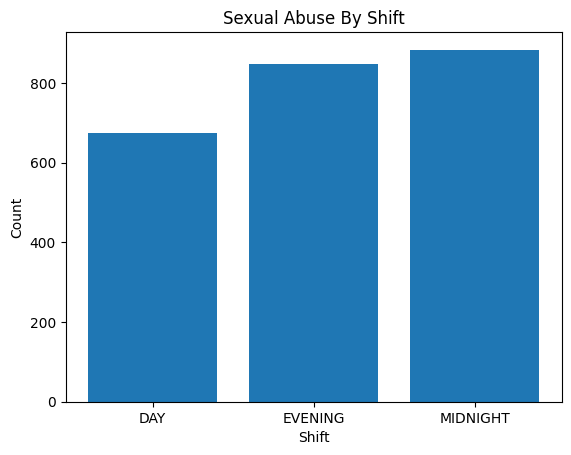

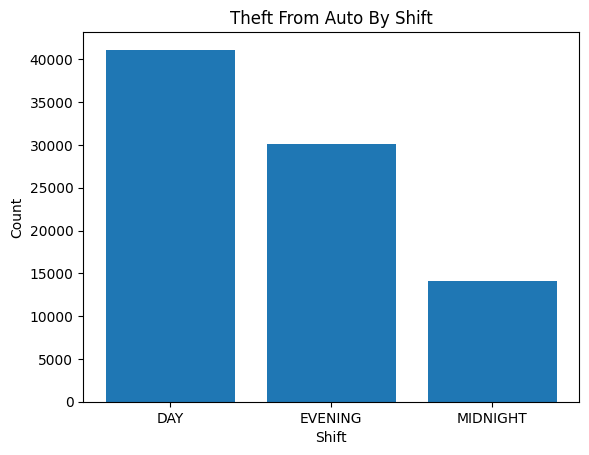

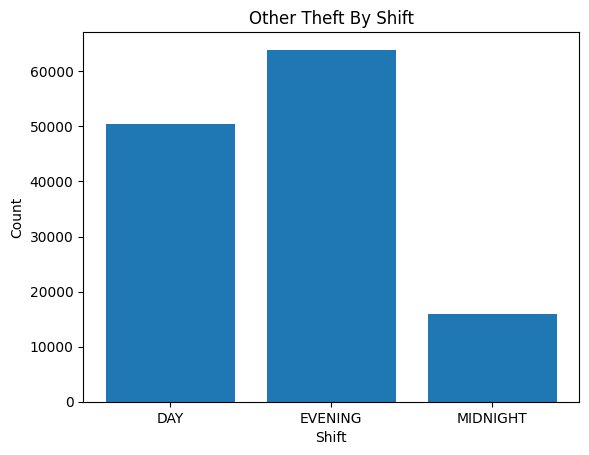

In [ ]:
table_2 = pd.crosstab(df_main['OFFENSE'], df_main['SHIFT'])
display(table_2)

xlabel_order = ['DAY', 'EVENING', 'MIDNIGHT']

arson = df_main[df_main['OFFENSE'] == 'ARSON']
ars_cnt = arson['SHIFT'].value_counts().reindex(xlabel_order, fill_value=0)
plt.bar(ars_cnt.index, ars_cnt.values)
plt.xticks(xlabel_order)
plt.xlabel('Shift')
plt.ylabel('Count')
plt.title('Arson By Shift')
plt.show()

print("\n\n")

assault_dw = df_main[df_main['OFFENSE'] == 'ASSAULT W/DANGEROUS WEAPON']
asa_cnt = assault_dw['SHIFT'].value_counts().reindex(xlabel_order, fill_value=0)
plt.bar(asa_cnt.index, asa_cnt.values)
plt.xticks(xlabel_order)
plt.xlabel('Shift')
plt.ylabel('Count')
plt.title('Assault w/ Dangerous Weapon By Shift')
plt.show()

print("\n\n")

burglary = df_main[df_main['OFFENSE'] == 'BURGLARY']
bur_cnt = burglary['SHIFT'].value_counts().reindex(xlabel_order, fill_value=0)
plt.bar(bur_cnt.index, asa_cnt.values)
plt.xticks(xlabel_order)
plt.xlabel('Shift')
plt.ylabel('Count')
plt.title('Burglaries By Shift')
plt.show()

print("\n\n")

homicide = df_main[df_main['OFFENSE'] == 'HOMICIDE']
hom_cnt = homicide['SHIFT'].value_counts().reindex(xlabel_order, fill_value=0)
plt.bar(hom_cnt.index,hom_cnt.values)
plt.xticks(xlabel_order)
plt.xlabel('Shift')
plt.ylabel('Count')
plt.title('Homicide By Shift')
plt.show()

print("\n\n")

mvt = df_main[df_main['OFFENSE'] == 'MOTOR VEHICLE THEFT']
mvt_cnt = mvt['SHIFT'].value_counts().reindex(xlabel_order, fill_value=0)
plt.bar(mvt_cnt.index, mvt_cnt.values)
plt.xticks(xlabel_order)
plt.xlabel('Shift')
plt.ylabel('Count')
plt.title('Motor Vehicle Thefts By Shift')
plt.show()

print("\n\n")

rob = df_main[df_main['OFFENSE'] == 'ROBBERY']
rob_cnt = mvt['SHIFT'].value_counts().reindex(xlabel_order, fill_value=0)
plt.bar(rob_cnt.index, rob_cnt.values)
plt.xticks(xlabel_order)
plt.xlabel('Shift')
plt.ylabel('Count')
plt.title('Robbery By Shift')
plt.show()

print("\n\n")

sa = df_main[df_main['OFFENSE'] == 'SEX ABUSE']
sa_cnt = sa['SHIFT'].value_counts().reindex(xlabel_order, fill_value=0)
plt.bar(sa_cnt.index, sa_cnt.values)
plt.xticks(xlabel_order)
plt.xlabel('Shift')
plt.ylabel('Count')
plt.title('Sexual Abuse By Shift')
plt.show()

print("\n\n")

ta = df_main[df_main['OFFENSE'] == 'THEFT F/AUTO']
ta_cnt = ta['SHIFT'].value_counts().reindex(xlabel_order, fill_value=0)
plt.bar(ta_cnt.index, ta_cnt.values)
plt.xticks(xlabel_order)
plt.xlabel('Shift')
plt.ylabel('Count')
plt.title('Theft From Auto By Shift')
plt.show()

print("\n\n")

to = df_main[df_main['OFFENSE'] == 'THEFT/OTHER']
to_cnt = to['SHIFT'].value_counts().reindex(xlabel_order, fill_value=0)
plt.bar(to_cnt.index, to_cnt.values)
plt.xticks(xlabel_order)
plt.xlabel('Shift')
plt.ylabel('Count')
plt.title('Other Theft By Shift')
plt.show()

print("\n\n")

In [ ]:
from scipy.stats import chi2_contingency
p_val = chi2_contingency(pd.crosstab(df_main['SHIFT'], df_main['OFFENSE'])).pvalue
print(float(p_val))

0.0


**Conclusion from Chi-Squared Test**  
Based on our p-value, we can reject the null hypothesis that the time of day that the offense occurred does not have an effect on the type of offense that occurred. The p-value is 0.0, which is less than our significance level of 0.05. This means that we can reject the null and have enough evidence to conclude that the shift during which the crime occurred does have an effect the on the type of crime that occurred.

#**Primary Analysis**



At this point in the data life cycle process, a Random Forest Classification will be performed to further explore the data. Random Forest creates multiple decision trees using unique random samples from the dataset for each tree, then putting the input through all the trees and taking the majority predicted class as the overall prediction. In the context of this analysis, Random Forest is one of the best models to use since our data is categorical, which Random Forest is ideal for, and our question is a classification question, and this is a Random Forest **Classifier**.

Our goal is to create a model that will predict whether you are likely to be affected by a severe crime (homicide, assualt w/ dangerous weapon, sex abuse, arson, robbery) given which D.C. district you are in and at what time of day (morning, afternoon, evening, night).

First we will load the data and begin preprossessing. The main focus of our anaylsis is to find a relationship between the time of day and district with the severity of the crime. The data is extracted into different cateorgies to do this such as shift, time of day, and the day of the week. These are used to find a more accurate assessment of the relationship. The severe crimes are defined.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

#Load the Data
crime_data = pd.read_csv(filepath)

#Preprocessing
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
crime_data['time_category'] = pd.cut(crime_data['hour'], bins = bins, labels = labels, right = False)

#Day of week extraction
crime_data['day_of_week'] = pd.to_datetime(crime_data['REPORT_DAT']).dt.day_name()

#Define severe crimes
severe_crimes = ['ROBBERY', 'ASSAULT W/DANGEROUS WEAPON', 'SEX ABUSE', 'HOMICIDE', 'ARSON']
crime_data['is_severe'] = crime_data['OFFENSE'].isin(severe_crimes).astype(int)

<ipython-input-40-cf0cb7d4a767>:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data['day_of_week'] = pd.to_datetime(crime_data['REPORT_DAT']).dt.day_name()


Next, the features for the model will be defined. The data will be split into two sets, testing and training. The training set will be used to train the Machine Learning Model and the testing set will be used to evaluate the accuracy of the model.  

In [ ]:
features = ['hour', 'DISTRICT', 'time_category']
X = pd.get_dummies(crime_data[features])
y = crime_data['is_severe']

# Train/test split
seed = 42
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

Scaling of the training and testing sets will occur to standardize the data to ensure the features have comparable scales. This is done through subtracting their mean and considering their standard deviation.  

Now it is time to train the data. Random Forest is initialized and is then fitted to learn the patterns from the training data to predict the differences between y_train and x_train.

In [ ]:
# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=seed)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

The output of this process is now evaluated. The prediction from the model will be put through an accuracy score function to see how well the model performed on the data set. The classification report will show multiple evaluation metrics: precision, recall and f1-score.

In [ ]:
# Evaluate
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.819
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     56079
           1       0.53      0.06      0.10     12495

    accuracy                           0.82     68574
   macro avg       0.68      0.52      0.50     68574
weighted avg       0.77      0.82      0.75     68574



The evaluation metrics show that the model has an overeall accuracy of 81.9%, overall precision of 68%, and recall of 52%. The lower precision and very low recall for the severe crime (1) class is likely because our dataset is very imbalanced due to the high prevalence of "theft" in the dataset.

Though the crimes are grouped, because "theft" is grouped as a non-severe crime it skews the data such that the model is liekly trained on more non-severe crime data than severe crime data, and such does not predict it as often or as well.

Still, by grouping the crimes to limit the imbalance, rather than attempting to predict each individual crime, we are able to use a Random Forest Classifier to make predictions with a relatively high accuracy.

---

Side Note: Initial attempts at creating a model to predict specific crimes yielded a very low accuracy (39.1%) model becuase of this imbalance resulting in theft being predicted for almost all situations since other crimes were so rare in the dataset by comparison. If we wanted to expand on the current model to predict specific crimes, we could use a two-step classifier, where the crime is first predicted as either severe or non-severe and then put through another model that will determine the type of severe or non-severe crime. This would have likely had a better outcome than our initial approach since it would limit the imbalance, assuming that we create a separate class to predict theft within the first model outside of the non-severe class.

---

This last part of the primary analysis will be to assess the risks and times associated with higher risk. These will be used to visualize the output of our Machine Learning Model.

In [ ]:
# Group and calculate % of severe crimes
risk_summary = crime_data.groupby(['day_of_week', 'time_category'], observed = False)['is_severe'].mean().reset_index()

# Pivot for heatmap
pivot = risk_summary.pivot(index='time_category', columns='day_of_week', values='is_severe')

# Ensure weekday order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot[day_order]  # Reorder columns

#**Visualization**

A heatmap will be created to vizualize the severity of the crime during a specific time of day for each day of the week (Monday-Sunday). The size bar, which is the legend, showcases lighter colors for lesser sever crimes and darkens as the severity of the crime increases.

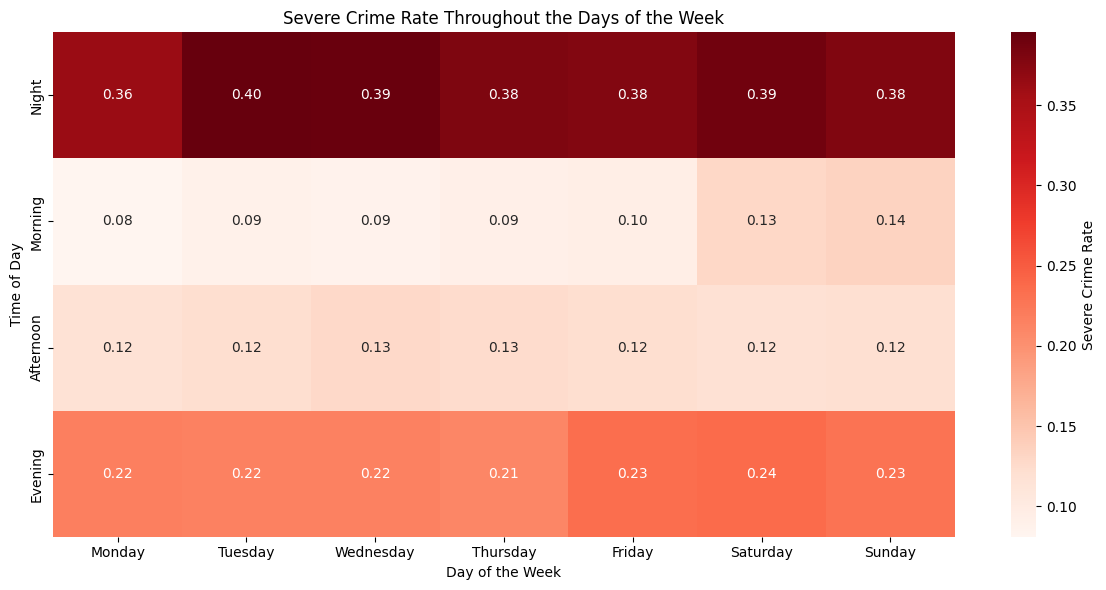

In [ ]:
#Plot
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot = True, cmap = 'Reds', fmt = ".2f", cbar_kws = {'label': 'Severe Crime Rate'})
plt.title('Severe Crime Rate Throughout the Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Time of Day')
plt.tight_layout()
plt.show()

# Insight and Conclusions

Based on our analysis of the statistical results and our model, we are able to make the following conclusions:

* The day of the week with the most crime rate is Saturday, as it had the highest percentage of crimes of varying severity across the week in the DC Metro area from 2007-2017.

* The time of day with the most crime in the DC Metro area from 2007-2017 was night. We classified night as the hours from midnight to 6 AM. This was also when the most severe crime occured across all days of the week.

Overall, we can use this data and analysis to help the community figure out when the best times and days to take the DC Metro are. The analysis shows that the DC Metro is dangerous particularly on Saturday and at nightime, which can help people know to avoid it during that time.

If we analyzed further, we could expand our data to look at the crime severity rates based on times and days in other areas in DC or on other forms of transport. For example, if we looked at the data for crimes in the same area but when the person is on other forms of transport, such as public buses or ubers, we may be able to tell if those forms of transport are safer during specific times/dates.
